# Can network fit random labels?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [2]:
torch.manual_seed(1)

## Datasets

### MNIST

In [3]:
# The training data
mnist_training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# The testing data
mnist_test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

## Random Labels

In [4]:
random_labels = torch.tensor(
    np.random.randint(
        0,
        10,
        (len(mnist_training_data)),
    )
)
mnist_training_data.targets = random_labels

## Training Function

In [5]:
def train(args, model, train_loader, loss_func, optimizer, epoch):
    model.train()
    loss = None
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args["log_interval"] == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                    loss.item(),
                )
            )
    return loss.item()

## Testing Function

In [6]:
def test(model, loss_func, test_loader):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = loss_func(output, target)
            test_loss += loss.mean().item() * data.size(0)

    test_loss /= len(test_loader.dataset)

    print(
        "\nTest set: Average loss: {:.4f}\n".format(
            test_loss,
        )
    )

    return test_loss

## DNN Model

In [7]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [8]:
batch_size = 100

mnist_train_dataloader = DataLoader(
    mnist_training_data, batch_size=batch_size, shuffle=True
)
mnist_test_dataloader = DataLoader(
    mnist_test_data, batch_size=batch_size, shuffle=False
)

In [9]:
args = {"log_interval": 500, "lr": 1e-4, "epochs": 1000}

In [10]:
model = Model()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args["lr"])

In [11]:
training_loss = []
testing_loss = []
for epoch in range(1, args["epochs"] + 1):
    loss = train(args, model, mnist_train_dataloader, loss_func, optimizer, epoch)
    training_loss.append(loss)
    loss = test(model, loss_func, mnist_test_dataloader)
    testing_loss.append(loss)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.308933
Train Epoch: 1 [50000/60000 (83%)]	Loss: 2.315125

Test set: Average loss: 2.3061

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.290186
Train Epoch: 2 [50000/60000 (83%)]	Loss: 2.298994

Test set: Average loss: 2.2971

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.277503
Train Epoch: 3 [50000/60000 (83%)]	Loss: 2.291087

Test set: Average loss: 2.3134

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.280203
Train Epoch: 4 [50000/60000 (83%)]	Loss: 2.298736

Test set: Average loss: 2.3026

Train Epoch: 5 [0/60000 (0%)]	Loss: 2.287140
Train Epoch: 5 [50000/60000 (83%)]	Loss: 2.278105

Test set: Average loss: 2.3027

Train Epoch: 6 [0/60000 (0%)]	Loss: 2.286153
Train Epoch: 6 [50000/60000 (83%)]	Loss: 2.306309

Test set: Average loss: 2.3109

Train Epoch: 7 [0/60000 (0%)]	Loss: 2.280952
Train Epoch: 7 [50000/60000 (83%)]	Loss: 2.271842

Test set: Average loss: 2.2998

Train Epoch: 8 [0/60000 (0%)]	Loss: 2.280116
Train Epoch: 8 [50000/60000 (83%)]	Loss: 2.260016

Test set

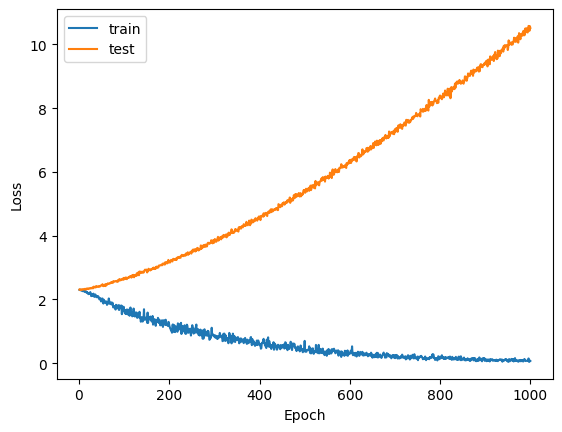

In [12]:
plt.plot(np.arange(1, args["epochs"] + 1), training_loss, label="train")
plt.plot(np.arange(1, args["epochs"] + 1), testing_loss, label="test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()